Link Source Data:
https://www.kaggle.com/datasets/larsen0966/student-performance-data-set

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

# memasukkan data sebagai variabel dataframe df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Akhir/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
print(df.shape)

(649, 33)


# **Data Cleaning**

In [ ]:
df_fix = df.drop(["address", "famsize", "romantic", "Dalc", "Walc", "goout", "nursery", "traveltime", "guardian", "Fjob", "Mjob", "Fedu", "Medu", "schoolsup", "famsup", "paid", "famrel"], axis=1)
df_fix.head()

,school,sex,age,Pstatus,reason,studytime,failures,activities,higher,internet,freetime,health,absences,G1,G2,G3
0,GP,F,18,A,course,2,0,no,yes,no,3,3,4,0,11,11
1,GP,F,17,T,course,2,0,no,yes,yes,3,3,2,9,11,11
2,GP,F,15,T,other,2,0,no,yes,yes,3,3,6,12,13,12
3,GP,F,15,T,home,3,0,yes,yes,yes,2,5,0,14,14,14
4,GP,F,16,T,home,2,0,no,yes,no,3,5,0,11,13,13


In [ ]:
print(df_fix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   Pstatus     649 non-null    object
 4   reason      649 non-null    object
 5   studytime   649 non-null    int64 
 6   failures    649 non-null    int64 
 7   activities  649 non-null    object
 8   higher      649 non-null    object
 9   internet    649 non-null    object
 10  freetime    649 non-null    int64 
 11  health      649 non-null    int64 
 12  absences    649 non-null    int64 
 13  G1          649 non-null    int64 
 14  G2          649 non-null    int64 
 15  G3          649 non-null    int64 
dtypes: int64(9), object(7)
memory usage: 81.2+ KB
None


In [ ]:
print(df_fix.shape)

(649, 16)


In [ ]:
df_fix.isnull().any()

school        False
sex           False
age           False
Pstatus       False
reason        False
studytime     False
failures      False
activities    False
higher        False
internet      False
freetime      False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool


*   School: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira
*   Sex:  'F' - female or 'M' - male
*   Age: from 15 to 22
*   Pstatus: binary: 'T' - living together or 'A' - apart
*   reason: why choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
*   studytime: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours
*   failures: number past class failures n if 1<=n<3, else 4
*   activities: extracurricular yes or no
*   higher: wants to take higher education (binary: yes or no)
*   internet: Internet access at home (binary: yes or no)
*   freetime: free time after school (numeric: from 1 - very low to 5 - very high
*   absences: number of school absences (numeric: from 0 to 93)
*   g1: first period grade (numeric: from 0 to 20)
*   g2: second period grade (numeric: from 0 to 20)
*   g3: final grade (numeric: from 0 to 20, output target)


















# **EDA**

In [ ]:
df_fix.describe()

,age,studytime,failures,freetime,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.930663,0.221880,3.180277,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.829510,0.593235,1.051093,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,3.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,0.000000,3.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,0.000000,4.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


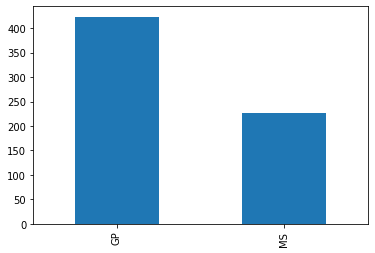

In [ ]:
df_fix['school'].value_counts().plot.bar()

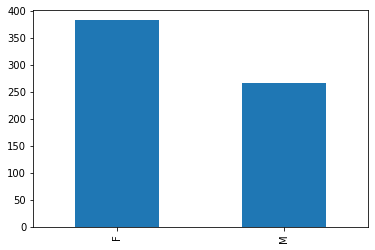

In [ ]:
df_fix['sex'].value_counts().plot.bar()

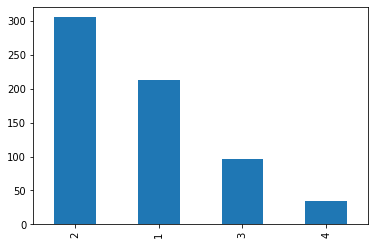

In [ ]:
df_fix['studytime'].value_counts().plot.bar()

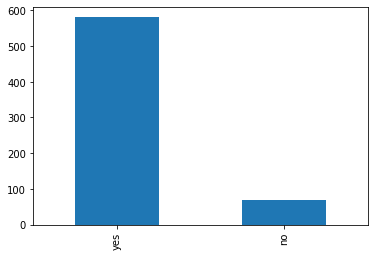

In [ ]:
df_fix['higher'].value_counts().plot.bar()

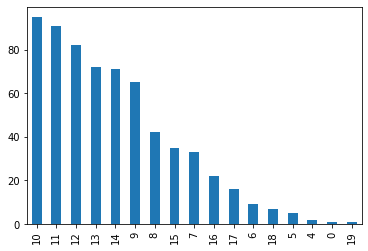

In [ ]:
df_fix['G1'].value_counts().plot.bar()

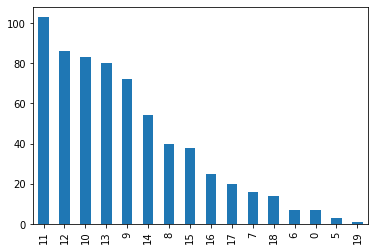

In [ ]:
df_fix['G2'].value_counts().plot.bar()

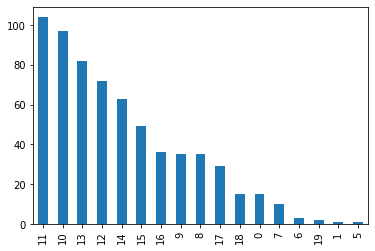

In [ ]:
df_fix['G3'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd008bcad90>]],
      dtype=object)

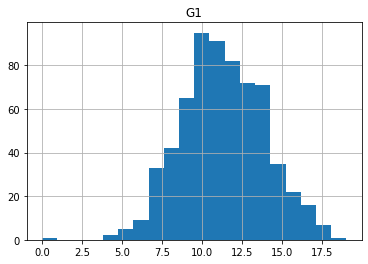

In [ ]:
df.hist(column='G1', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd008b01090>]],
      dtype=object)

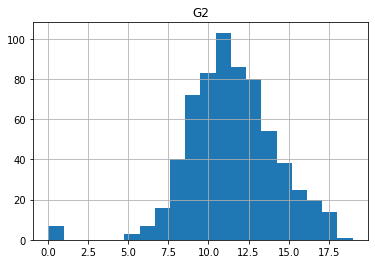

In [ ]:
df.hist(column='G2', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00934df10>]],
      dtype=object)

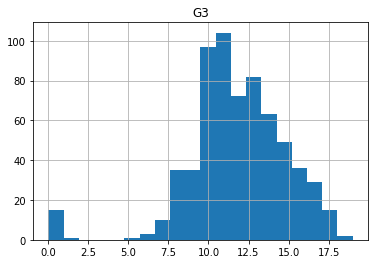

In [ ]:
df.hist(column='G3', bins=20)

In [ ]:
df_fix["Gtotal"] = df_fix["G1"] + df_fix["G2"] + df_fix["G3"]

In [ ]:
df_fix.head()

,school,sex,age,Pstatus,reason,studytime,failures,activities,higher,internet,freetime,health,absences,G1,G2,G3,Gtotal
0,GP,F,18,A,course,2,0,no,yes,no,3,3,4,0,11,11,22
1,GP,F,17,T,course,2,0,no,yes,yes,3,3,2,9,11,11,31
2,GP,F,15,T,other,2,0,no,yes,yes,3,3,6,12,13,12,37
3,GP,F,15,T,home,3,0,yes,yes,yes,2,5,0,14,14,14,42
4,GP,F,16,T,home,2,0,no,yes,no,3,5,0,11,13,13,37


# **Feature Engineering**

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

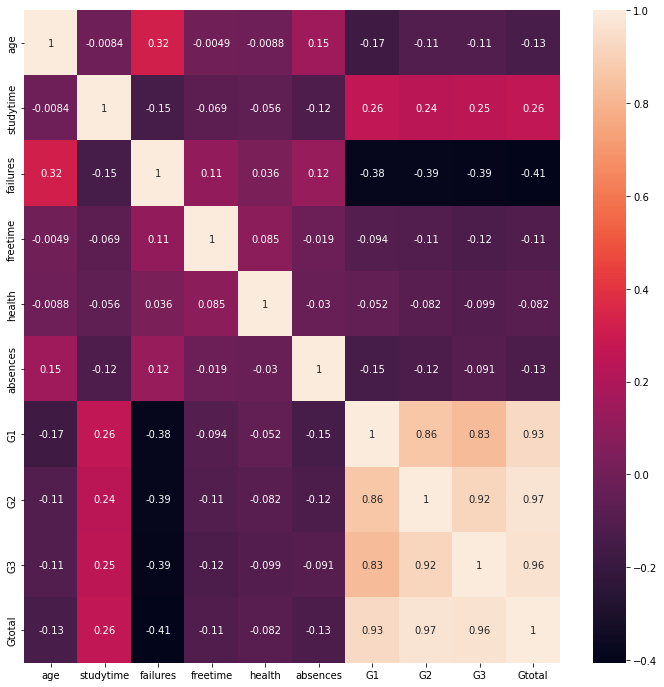

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_fix.corr(), annot=True)

**Yg bisa dipake**

*   Hubungan studytime dengan G1 0,26
*   Hubungan studytime dengan G2 0,24
*   Hubungan studytime dengan G3 0,25
*   Absences dengan failures
*   Age sama failures



Kita mau pakai hubungan studytime dengan Gtotal




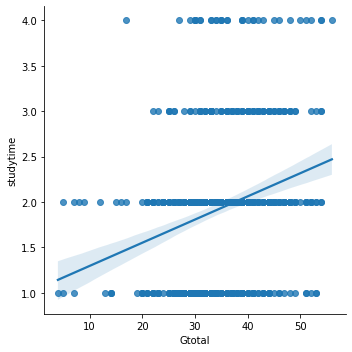

In [ ]:
sns.lmplot(x='Gtotal',y='studytime', data = df_fix)

In [ ]:
# plt.scatter("") plot

# **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x = df_fix[['studytime']]
y = df_fix[['Gtotal']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
# 0.3 70 30
# 0.2 80 20

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (519, 1)
X_test :  (130, 1)
Y_train :  (519, 1)
Y_test :  (130, 1)


In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
linear_regression_model.coef_

array([[2.44212509]])

In [ ]:
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
studytime,2.442125


In [ ]:
linear_regression_model.intercept_

array([30.24253355])

Text(0, 0.5, 'Predicted Gtotal')

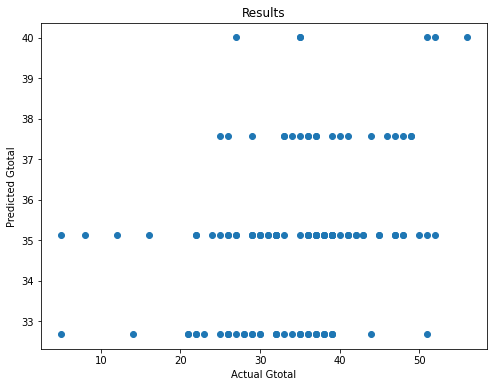

In [ ]:
predictions = linear_regression_model.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Gtotal")
plt.ylabel("Predicted Gtotal")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.9465441539522494
MSE: 80.37362645321518
RMSE: 8.965133933925092


In [ ]:
x2 = df_fix[['studytime', 'health', 'absences']]
y2 = df_fix['Gtotal']

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2) 
# 0.3 70 30
# 0.2 80 20

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (519, 3)
X_test :  (130, 3)
Y_train :  (519,)
Y_test :  (130,)


In [ ]:
linear_regression_model_2 = LinearRegression()
linear_regression_model_2.fit(x_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(linear_regression_model_2.coef_, x2.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
studytime,2.290586
health,-0.608510
absences,-0.154028


In [ ]:
linear_regression_model_2.intercept_

33.3209301216231

Text(0, 0.5, 'Predicted Gtotal')

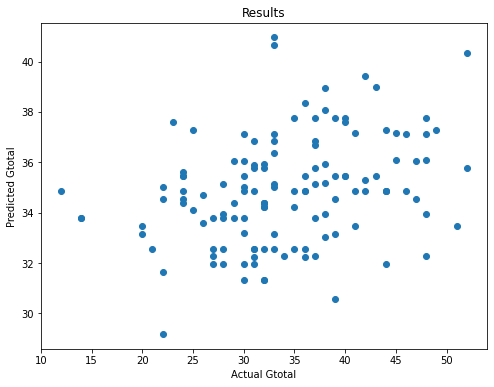

In [ ]:
predictions = linear_regression_model_2.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Gtotal")
plt.ylabel("Predicted Gtotal")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.166281533335784
MSE: 60.24184501318477
RMSE: 7.76156202147382
